In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
data=pd.read_csv(r"C:\Users\anjup\Downloads\titanic_dataset .csv")

In [313]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [315]:
#checking for null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [316]:
#Handling missing values
data['Age']=data['Age'].fillna(data['Age'].median())
data['Cabin']=data['Cabin'].fillna('Unknown')
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [317]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Handling Outliers

No outlier  for Survived

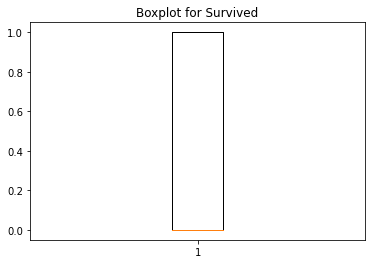

In [318]:
plt.boxplot(data['Survived'])
plt.title("Boxplot for Survived")
plt.show()

No outlier for PClass

Text(0.5, 1.0, 'Boxplot for Pclass')

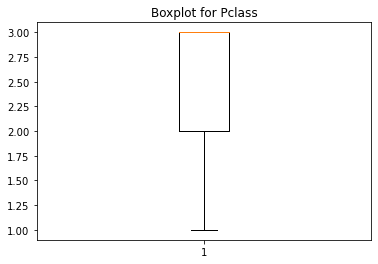

In [319]:
plt.boxplot(data['Pclass'])
plt.title("Boxplot for Pclass")

Handling Outlier for Age using flooring and capping method

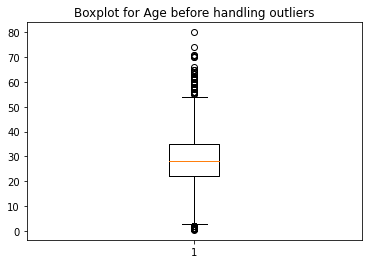

In [320]:
plt.boxplot(data['Age'])
plt.title("Boxplot for Age before handling outliers")
plt.show()

In [321]:
Q1=np.percentile(data['Age'],25)
Q2=np.percentile(data['Age'],50)
Q3=np.percentile(data['Age'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

data['Age']=np.where(data['Age']>Upp_limit,Upp_limit,np.where(data['Age']<Low_limit,Low_limit,data['Age']))

The first quartile : 22.0 
The Second Quartile : 28.0 
The third Quartile : 35.0 
IQR : 13.0 
Upper limit :  54.5 
Lower Limit : 2.5


After handling the outliers

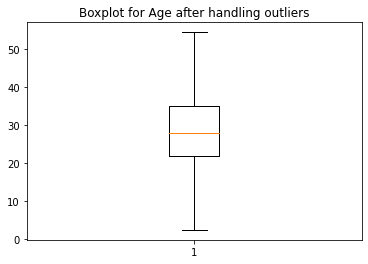

In [322]:
plt.boxplot(data['Age'])
plt.title("Boxplot for Age after handling outliers")
plt.show()

Removing the outliers for SibSp

Text(0.5, 1.0, 'Boxplot for SibSp')

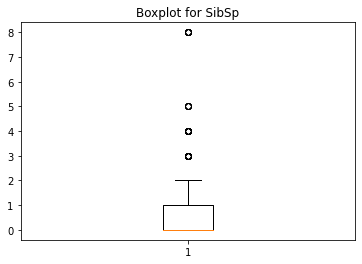

In [323]:

plt.boxplot(data['SibSp'])
plt.title("Boxplot for SibSp")

In [324]:
Q1=np.percentile(data['SibSp'],25)
Q2=np.percentile(data['SibSp'],50)
Q3=np.percentile(data['SibSp'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in data['SibSp']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")

index_drop=data[(data['SibSp']>Upp_limit) | (data['SibSp']<Low_limit)].index
print(index_drop)

data=data.drop(index_drop)



The first quartile : 0.0 
The Second Quartile : 0.0 
The third Quartile : 1.0 
IQR : 1.0 
Upper limit :  2.5 
Lower Limit : -1.5
The outliers are : [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]
Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')


Removing the outliers for Parch


Text(0.5, 1.0, 'Boxplot for Parch')

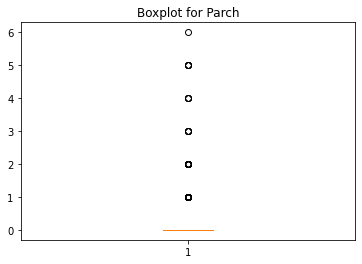

In [325]:
plt.boxplot(data['Parch'])
plt.title("Boxplot for Parch")

In [326]:
Q1=np.percentile(data['Parch'],25)
Q2=np.percentile(data['Parch'],50)
Q3=np.percentile(data['Parch'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in data['Parch']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")


index_drop=data[(data['Parch']>Upp_limit) | (data['Parch']<Low_limit)].index
print(index_drop)

data=data.drop(index_drop)



The first quartile : 0.0 
The Second Quartile : 0.0 
The third Quartile : 0.0 
IQR : 0.0 
Upper limit :  0.0 
Lower Limit : 0.0
The outliers are : [2, 1, 5, 5, 2, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 5, 2, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 5, 2]
Int64Index([  8,  10,  13,  25,  43,  54,  58,  65,  78,  86,
            ...
            853, 855, 856, 858, 869, 871, 879, 880, 885, 888],
           dtype='int64', length=169)


Handling Outlier for Fare using flooring and capping method


Text(0.5, 1.0, 'Boxplot for Fare before handling outliers')

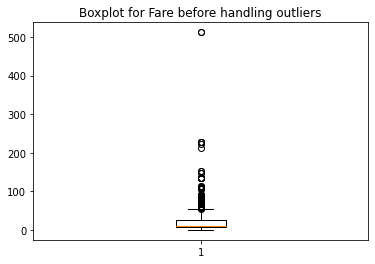

In [327]:
plt.boxplot(data['Fare'])
plt.title("Boxplot for Fare before handling outliers")

In [328]:
Q1=np.percentile(data['Fare'],25)
Q2=np.percentile(data['Fare'],50)
Q3=np.percentile(data['Fare'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)


data['Fare']=np.where(data['Fare']>Upp_limit,Upp_limit,np.where(data['Fare']<Low_limit,Low_limit,data['Fare']))


The first quartile : 7.8542 
The Second Quartile : 10.5 
The third Quartile : 26.0 
IQR : 18.1458 
Upper limit :  53.2187 
Lower Limit : -19.364500000000003


After handling outliers

Text(0.5, 1.0, 'Boxplot for Fare after handling outliers')

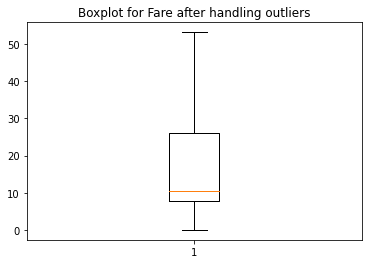

In [329]:
plt.boxplot(data['Fare'])
plt.title("Boxplot for Fare after handling outliers")

In [330]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,53.2187,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


Dropping the irelevant columns

In [331]:
data=data.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,53.2187,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


Label Encoding for sex and embarked

In [332]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a= ['Sex','Embarked']
for i in a:
    data[i]= le.fit_transform(data[i])

In [333]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,53.2187,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


MinMax Scaling

In [334]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data[['Scaled_Age',"Scaled_Fare"]]=scaler.fit_transform(data[['Age','Fare']])

In [335]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Scaled_Age,Scaled_Fare
0,0,3,1,22.0,1,0,7.2500,2,0.343434,0.136230
1,1,1,0,38.0,1,0,53.2187,0,0.666667,1.000000
2,1,3,0,26.0,0,0,7.9250,2,0.424242,0.148914
3,1,1,0,35.0,1,0,53.1000,2,0.606061,0.997770
4,0,3,1,35.0,0,0,8.0500,2,0.606061,0.151263


Splitting Test and Train Data

In [336]:
from sklearn.model_selection import train_test_split
x=data.drop(['Age','Fare','Survived'],axis=1)
y=data['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# KNN

In [337]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=13,metric='euclidean')
KNN_model.fit(x_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [338]:
score_KNN=KNN_model.score(x_test,y_test)
score_KNN

0.8382352941176471

KFold Cross Validation (K=10)

In [339]:
from sklearn.model_selection import KFold
KFold_validator=KFold(10)

In [340]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(KNN_model,x,y,cv= KFold_validator)
cv_result

array([0.80882353, 0.82352941, 0.77941176, 0.79411765, 0.85294118,
       0.86764706, 0.82089552, 0.79104478, 0.85074627, 0.76119403])

In [341]:
average_accuracy_score=np.mean(cv_result)
print("The average accuracy score of KNN on KFold Cross Validation :",average_accuracy_score)

The average accuracy score of KNN on KFold Cross Validation : 0.815035118525022


Stratified Cross Validation (splits=10)

In [342]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [343]:
cv_result=cross_val_score(KNN_model,x,y,cv= skfold_validator)
cv_result

array([0.85294118, 0.73529412, 0.82352941, 0.80882353, 0.89705882,
       0.77941176, 0.8358209 , 0.79104478, 0.85074627, 0.76119403])

In [344]:
average_accuracy_score=np.mean(cv_result)
print("The average accuracy score of KNN on Stratified Cross Validation :",average_accuracy_score)

The average accuracy score of KNN on Stratified Cross Validation : 0.8135864793678665


# SVM

In [345]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [346]:
score_SVM=svm_model.score(x_test,y_test)
score_SVM

0.8014705882352942

KFold Cross Validation(K=10)

In [347]:
from sklearn.model_selection import KFold
KFold_validator1=KFold(10)

In [348]:
from sklearn.model_selection import cross_val_score
cv_result_SVM=cross_val_score(svm_model,x,y,cv= KFold_validator1)
cv_result_SVM

array([0.80882353, 0.85294118, 0.79411765, 0.86764706, 0.79411765,
       0.82352941, 0.79104478, 0.7761194 , 0.86567164, 0.8358209 ])

In [349]:
average_accuracy_score_SVM=np.mean(cv_result_SVM)
print("The average accuracy score of SVM on KFold Cross Validation :",average_accuracy_score_SVM)

The average accuracy score of SVM on KFold Cross Validation : 0.8209833187006146


Stratified Cross Validation(splits=10)

In [350]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [351]:
cv_result_SVM=cross_val_score(svm_model,x,y,cv= skfold_validator)
cv_result_SVM

array([0.83823529, 0.80882353, 0.80882353, 0.88235294, 0.86764706,
       0.75      , 0.8358209 , 0.7761194 , 0.80597015, 0.8358209 ])

In [352]:
average_accuracy_score_SVM=np.mean(cv_result_SVM)
print("The average accuracy score of SVM on Stratified Cross Validation :",average_accuracy_score_SVM)

The average accuracy score of SVM on Stratified Cross Validation : 0.8209613696224759


# Conclusion

The performance of the KNN model on the given test dataset is 0.8382352941176471.
This indicates that the KNN model achieved an accuracy of approximately 83.82% on the test dataset.

The average accuracy score of KNN on KFold Cross Validation : 0.815035118525022.
This suggests that, on average, the KNN model achieved an accuracy of approximately 81.50% across multiple folds of cross-validation.
    
The average accuracy score of KNN on Stratified Cross Validation : 0.8135864793678665
This indicates that, on average, the KNN model achieved an accuracy of approximately 81.36% using stratified cross-validation.


The performance of the SVM model on the given test dataset is 0.8014705882352942
This suggests that the SVM model achieved an accuracy of approximately 80.15% on the test dataset.

The average accuracy score of SVM on KFold Cross Validation : 0.8209833187006146
This indicates that, on average, the SVM model achieved an accuracy of approximately 82.10% across multiple folds of cross-validation.

    
The average accuracy score of SVM on Stratified Cross Validation : 0.8209613696224759
This suggests that, on average, the SVM model achieved an accuracy of approximately 82.10% using stratified cross-validation.
